In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import psycopg2
from config_file import password

In [3]:
#cpi_df.head()

In [4]:
#import data from PGAdmin
conn = psycopg2.connect(user="postgres",
                       password=password,
                       host="localhost",
                       port="5432",
                       database="FinalProject")
cursor = conn.cursor()

In [5]:
cpi_df = pd.read_sql("select * from food_cpi_match",conn)

In [6]:
cpi_df.head()

,date,CPI
0,1995-01-01,147.0
1,1995-02-01,147.7
2,1995-03-01,147.1
3,1995-04-01,148.7
4,1995-05-01,148.7


In [7]:
cpi_df["date"] = pd.to_datetime(cpi_df["date"])

In [8]:
# Read gas_prices_filtered_match file
#gas_df=pd.read_csv("gas_prices_cleaned.csv")
#gas_df.head()

In [9]:
gas_df = pd.read_sql("select * from gas_prices_match",conn)

In [10]:
#change gas_df['Date'] datatype
gas_df['date'] = gas_df['date'].astype('datetime64[ns]')

In [11]:
gas_df.head()

,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [12]:
gas_df_2008 = gas_df.loc[gas_df["date"].between("2008-01-01", "2008-12-31")]

In [13]:
gas_df_2008.head(50)

,date,all_grades_all_formulation,all_grades_conventional,all_grades_refomulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
156,2008-01-01,3.159,3.135,3.208,3.109,3.088,3.154,3.220,3.187,3.285,3.335,3.313,3.375,3.376
157,2008-02-01,3.030,3.014,3.061,2.978,2.966,3.002,3.094,3.069,3.141,3.212,3.196,3.242,3.280
158,2008-03-01,3.212,3.185,3.269,3.162,3.137,3.216,3.277,3.239,3.351,3.386,3.362,3.430,3.658
159,2008-04-01,3.381,3.346,3.453,3.332,3.299,3.403,3.444,3.396,3.536,3.550,3.522,3.602,3.955
160,2008-05-01,3.663,3.620,3.751,3.613,3.571,3.699,3.725,3.673,3.825,3.842,3.804,3.911,4.149
161,2008-06-01,4.026,3.980,4.118,3.976,3.932,4.066,4.086,4.032,4.191,4.201,4.161,4.276,4.707
162,2008-07-01,4.165,4.099,4.301,4.114,4.051,4.247,4.229,4.148,4.387,4.344,4.283,4.459,4.727
163,2008-08-01,3.935,3.880,4.048,3.880,3.828,3.988,4.006,3.937,4.141,4.130,4.075,4.231,4.502
164,2008-09-01,3.733,3.715,3.769,3.680,3.667,3.707,3.802,3.769,3.867,3.918,3.897,3.957,4.121
165,2008-10-01,3.543,3.541,3.545,3.484,3.485,3.482,3.618,3.609,3.636,3.746,3.752,3.735,3.875


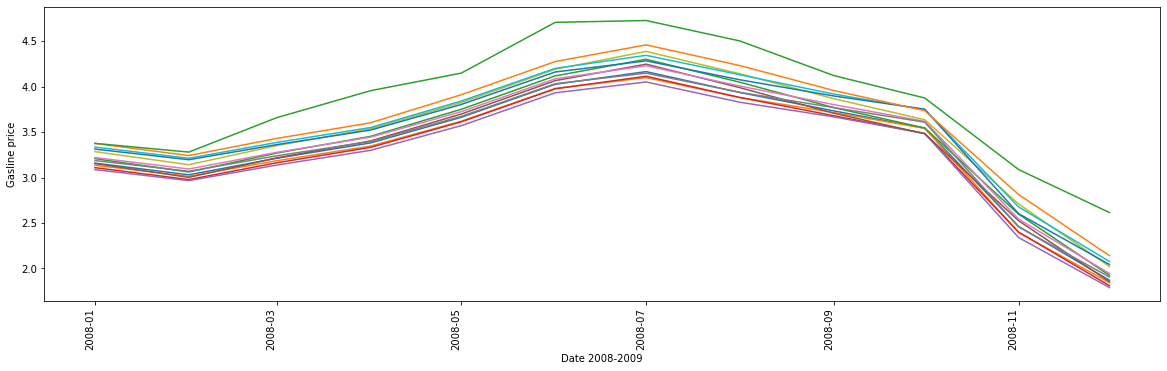

In [15]:
# See the trend of gas_price
x_axis=gas_df_2008["date"]
A1_axis=gas_df_2008["all_grades_all_formulation"]
A2_axis=gas_df_2008["all_grades_conventional"]
A3_axis=gas_df_2008["all_grades_refomulated"]
R1_axis=gas_df_2008["regular_all_formulation"]
R2_axis=gas_df_2008["regular_conventional"]
R3_axis=gas_df_2008["regular_reformulated"]
M1_axis=gas_df_2008["midgrade_all_formulation"]
M2_axis=gas_df_2008["midgrade_conventional"]
M3_axis=gas_df_2008["midgrade_reformulated"]
P1_axis=gas_df_2008["premium_all_formulation"]
P2_axis=gas_df_2008["premium_conventional"]
P3_axis=gas_df_2008["premium_reformulated"]
D_axis=gas_df_2008["no_2_diesel"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,A1_axis)
plt.plot(x_axis,A2_axis)
plt.plot(x_axis,A3_axis)
plt.plot(x_axis,R1_axis)
plt.plot(x_axis,R2_axis)
plt.plot(x_axis,R3_axis)
plt.plot(x_axis,M1_axis)
plt.plot(x_axis,M2_axis)
plt.plot(x_axis,M3_axis)
plt.plot(x_axis,P1_axis)
plt.plot(x_axis,P2_axis)
plt.plot(x_axis,P3_axis)
plt.plot(x_axis,D_axis)
plt.xlabel("Date 2008-2009")
plt.ylabel("Gasline price")



plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()